Giorgos Chatziligos AM4835 
EX1_PART2

Βημα 0 : Preprocessing

In [19]:
import pandas as pd
pd.options.display.max_rows = 9999

df = pd.read_csv('/home/gx2001/ex2_datamining/Census_Data.csv')

#print(df) 

#Rename CoW 
def catecorize_CoW(value):
    if 1 <= value <=2:
        return 'Private Employee'
    elif 3 <= value <=5:
        return 'Goverment Employee'
    elif 6<= value <= 7 :
        return 'Self-Employed'
    elif value == 8:
        return  'No Pay'
    else:
        return 'Unemployment'
df['CoW'] = df['CoW'].apply(catecorize_CoW)


df['education'] = pd.to_numeric(df['education'] , errors = 'coerce')

#Rename education 
def categorize_education(value):
    if 1 <= value<= 15:
        return 'No diploma'
    elif 16<=value<=17:
        return 'High School'
    elif 18<=value<=19:
        return 'Post-High-School'
    else:
        return value
df['education'] = df['education'].apply(categorize_education)

#Rename Marital
df['marital'] = pd.to_numeric(df['marital'] , errors = 'coerce')
def catecorize_marital(value):
    if value == 1:
        return 'married'
    elif value == 2:
        return 'widowed'
    elif value == 3:
        return 'separated'
    elif value == 4:
        return 'divorced'
    else:
        return 'single'
df['marital'] = df['marital'].apply(catecorize_marital)

#Rename PoB
df['PoB'] = pd.to_numeric(df['PoB'] , errors = 'coerce')
def categorize_PoB(value): 
    if value == 60:
        return 'Not US'
    elif value >=99:
        return 'Not US'
    else :return 'US'

df['PoB'] = df['PoB'].apply(categorize_PoB)

#Rename Sex
def categorize_Sex(value):
    if value == 1 :
        return 'Male'
    else :
        return 'Female'

df['sex'] = df['sex'].apply(categorize_Sex)

#Rename Race
def categorize_Race(value):
    if value == 1 :
        return 'White'
    elif value == 2 :
        return 'Black/African American'
    elif value == 3 :
        return 'American Indian'
    elif value == 4 :
        return 'Alaska Native'
    elif value == 5 :
        return 'American Indian/Alaska Native tribes specified'
    elif value == 6 :
        return 'Asian' 
    elif value == 7 :
        return 'Native Hawaiian/Pacific Islader' 
    elif value == 8:
        return 'Some Other Race'
    elif value == 9 :
        return 'Two or More Races'

df['race'] = df['race'].apply(categorize_Race)


attribute_values = pd.read_csv('/home/gx2001/Attribute_Values.csv')

state_mapping = attribute_values[attribute_values['Attribute'] == 'state'].set_index('NumValue')['Value'].to_dict()

df['state'] = df['state'].map(state_mapping)


df.to_csv("/home/gx2001/ex2_datamining/Updated_Dataframe.csv" , index=False)





#print(df)


#print(df)

Βημα 1 :

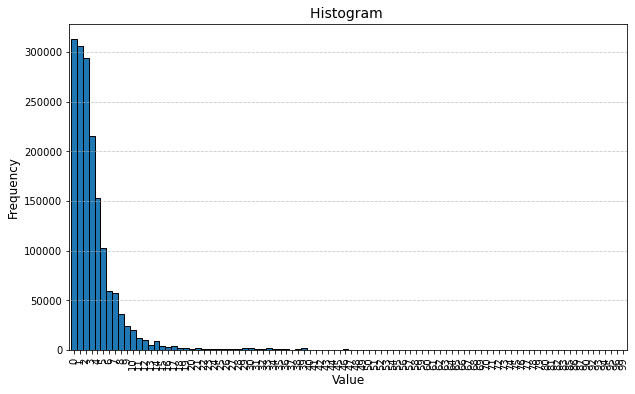

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


column = 'income'
df = pd.read_csv('/home/gx2001/ex2_datamining/Updated_Dataframe.csv')
df['Bin'] = pd.cut(df[column] , bins=100 , labels = False)
output_file = 'bin1'

bin_counts = df['Bin'].value_counts().sort_index()

plt.figure(figsize = (10,6))
#df[column].hist(bins=100 , figsize=(10,6))


bin_counts.plot(kind='bar' , figsize = (10,6) , width =1.0 , edgecolor = 'black')
plt.title('Histogram ' ,fontsize = 14)
plt.xlabel('Value' , fontsize = 12)
plt.ylabel('Frequency' , fontsize = 12)
plt.grid(axis = 'y' , linestyle = '--',alpha =0.7)
plt.show()
 


df.to_csv("/home/gx2001/ex2_datamining/bin1.csv" , index=False)


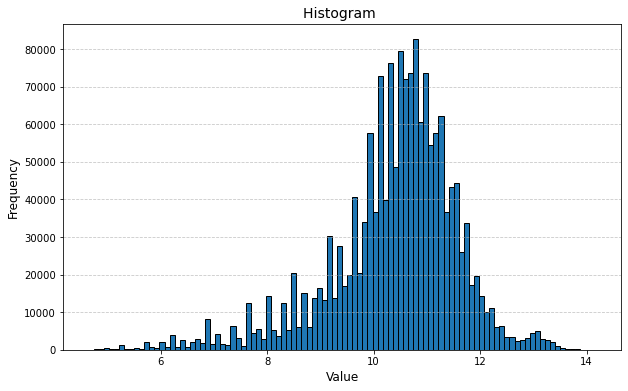

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


column = 'income'
df = pd.read_csv('/home/gx2001/ex2_datamining/Updated_Dataframe.csv')
df['log_income'] = np.log(df['income'])
df['log_income'].plot(kind='hist' , bins = 100 , figsize=(10,6) , edgecolor = 'black')



#bin_counts.plot(kind='bar' , figsize = (10,6) , width =1.0 , edgecolor = 'black')
plt.title('Histogram ' ,fontsize = 14)
plt.xlabel('Value' , fontsize = 12)
plt.ylabel('Frequency' , fontsize = 12)
plt.grid(axis = 'y' , linestyle = '--',alpha =0.7)
plt.show()
 


df.to_csv("/home/gx2001/ex2_datamining/bin1.csv" , index=False)


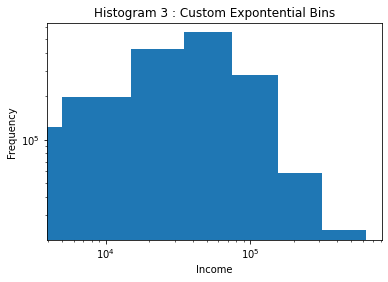

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


column = 'income'
df = pd.read_csv('/home/gx2001/ex2_datamining/Updated_Dataframe.csv')

#bins  = np.logspace(np.log10(500) , np.log10(300000),num =5)
bin = [0,5000 , 15000 , 35000,75000 , 155000 , 315000 , 635000 ]
# 5 , 10 , 20 ,40 , 80 , 160 , 320 
#print("Kadoi : " ,bins)
#print("Arithmos kadon " , len(bins))

plt.hist(df['income'] , bins = bin )
plt.xscale('log')
plt.yscale('log')
plt.title("Histogram 3 : Custom Expontential Bins")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

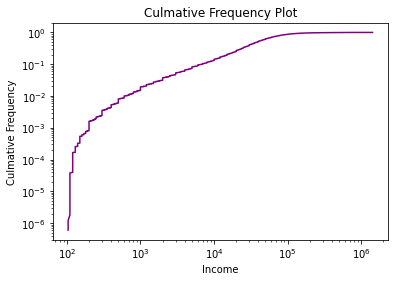

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


column = 'income'
df = pd.read_csv('/home/gx2001/ex2_datamining/Updated_Dataframe.csv')

data_sorted = df.sort_values(by = 'income')
data_sorted['culmative_frequency'] = np.arange(1 , len(data_sorted) +1)/len(data_sorted)
plt.plot(data_sorted['income'] , data_sorted['culmative_frequency'] , color = 'purple')
plt.title("Culmative Frequency Plot")
plt.xlabel("Income")
plt.ylabel("Culmative Frequency")
plt.xscale('log')
plt.yscale('log')
plt.show()

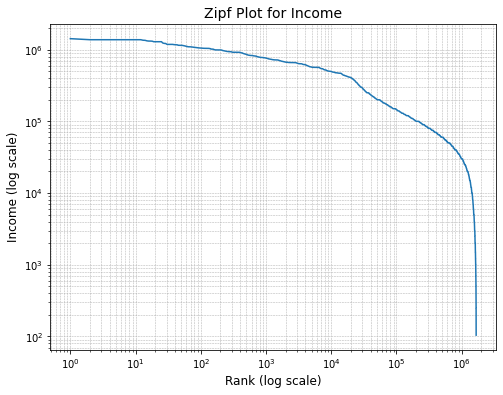

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


column = 'income'
df = pd.read_csv('/home/gx2001/ex2_datamining/Updated_Dataframe.csv')

df_sort = df.sort_values(by = column , ascending = False)

df_sort['Rank'] = np.arange(1 , len(df_sort) +1)

plt.figure(figsize = (8,6))
plt.loglog(df_sort['Rank'] , df_sort[column])
plt.title("Zipf Plot for Income", fontsize=14)
plt.xlabel("Rank (log scale)", fontsize=12)
plt.ylabel("Income (log scale)", fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.show()




Συμπερασμα για τη κατανομη :
H κατανομη που ακολουθειται ειναι κανονικη συμφωνα με το διαγραμμα στο δευτερο ερωτημα διοτι εχει συμμετρια γυρω απο τη μεση τιμη και το χαρακτηριστικο σχημα καμπανας 

Βημα 2 :

P-Value: 0.0000


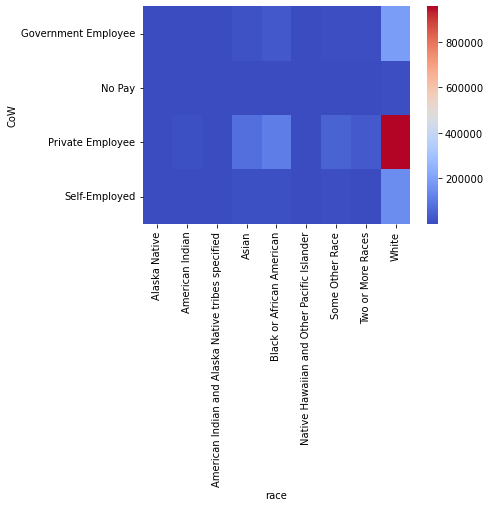

Lift values: race                 Alaska Native  American Indian  \
CoW                                                   
Government Employee       2.963830         1.952874   
No Pay                    1.042677         1.112586   
Private Employee          0.638889         0.846948   
Self-Employed             0.767457         0.727567   

race                 American Indian and Alaska Native tribes specified  \
CoW                                                                       
Government Employee                                           1.158197    
No Pay                                                        1.047632    
Private Employee                                              1.004476    
Self-Employed                                                 0.742433    

race                    Asian  Black or African American  \
CoW                                                        
Government Employee  0.803210                   1.302920   
No Pay               1.26

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns 

df = pd.read_csv('/home/gx2001/ex2_datamining/Census_Data_cleaned.csv')
cdf = pd.crosstab(df['CoW'] , df['race'] )
cdf
chi , p , dof , expected = stats.chi2_contingency(cdf)
print(f"P-Value: {p:.4f}")
sns.heatmap(cdf , cmap = "coolwarm")
plt.show()

In [32]:
lift = cdf / expected
print("Lift values:" , lift)

Lift values: race                 Alaska Native  American Indian  \
CoW                                                   
Government Employee       2.963830         1.952874   
No Pay                    1.042677         1.112586   
Private Employee          0.638889         0.846948   
Self-Employed             0.767457         0.727567   

race                 American Indian and Alaska Native tribes specified  \
CoW                                                                       
Government Employee                                           1.158197    
No Pay                                                        1.047632    
Private Employee                                              1.004476    
Self-Employed                                                 0.742433    

race                    Asian  Black or African American  \
CoW                                                        
Government Employee  0.803210                   1.302920   
No Pay               1.26

Σχολιασμος αποτελεσματων (CoW) - (Race) :
P-value :επειδη το p-value ειναι μικρο υπαρχει ισχυρη σχεση μεταξυ των δυο μεταβλητων 
Heatmap : οι White εχουν μεγαλυτεργ παρουσια στο Private employee 
Alaska Native  και American Indian εχουν θεση σαν Δημοσιοι Υπαλληλοι 
lift :Alaska Native  και American Indian εχουν θεση σαν Δημοσιοι Υπαλληλοι 
Asians φαινεται να να ανηκουν στην κατηγορια No-Pay
Black or African American φαινεται να να ανηκουν στην κατηγοριες No Pay Self-Employed 
Υπαρχουν εμφανεις διαφορες στην κατανομη εργασιας και στις φυλετικες ομαδες

P-Value: 0.0000


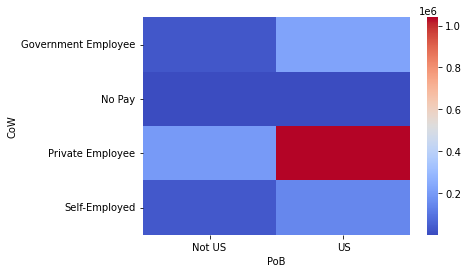

Lift values: PoB                    Not US        US
CoW                                    
Government Employee  0.693275  1.055904
No Pay               1.052888  0.990361
Private Employee     1.035712  0.993491
Self-Employed        1.180907  0.967028


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('/home/gx2001/ex2_datamining/Census_Data_cleaned.csv')


#Third
#CoW and  PoB
#First is statistics , pvalue , dof ,expected_frequency
cdf = pd.crosstab(df['CoW'] , df['PoB'] )
chi , p , dof , expected = stats.chi2_contingency(cdf)
print(f"P-Value: {p:.4f}")

sns.heatmap(cdf , cmap = "coolwarm")
plt.show()
lift = cdf / expected
print("Lift values:" , lift)

Σχολιασμος αποτελεσματων (CoW) - (Race) : 
P-value : υπαρχει στατιστικη διαφορα αναμεσα στις δυο αυτες κατηγοριες 
Heatmap : στην κατηγορια US υπαρχει υψυλη συχνοτητα των Private Employees
Lift Values : βλεπουμε μικρο lift στους ανθρωπους που εινα Not-US να δουλεουν στο Goverment Employee με σημαντικη διαφορα σε σχεση με τις υπολοιπες τιμες lift  

P-Value: 0.0000


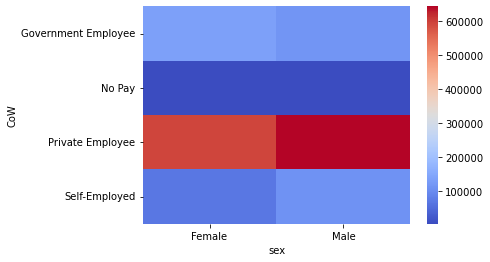

Lift values: sex                    Female      Male
CoW                                    
Government Employee  1.132883  0.877691
No Pay               1.005335  0.995090
Private Employee     1.002992  0.997246
Self-Employed        0.790129  1.193171


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('/home/gx2001/ex2_datamining/Census_Data_cleaned.csv')
#First 
#CoW and Sex 
#First is statistics , pvalue , dof ,expected_frequency
cdf = pd.crosstab(df['CoW'] , df['sex'] )

chi , p , dof , expected = stats.chi2_contingency(cdf)
stats.chi2_contingency(cdf)

print(f"P-Value: {p:.4f}")
sns.heatmap(cdf , cmap = "coolwarm")
plt.show()

lift = cdf / expected
print("Lift values:" , lift)



Σχολιασμος αποτελεσματων (CoW) - (Sex) : 
P-value : Σημαντικη στατιστικη διαφορα
Heatmap : 
Lift Values : Στο goverment employee βλεπουμε μικρο lift στους αντρες σε σχεση με τις γυναικες
Στο self employee βλεπουμε μικρο lift στους γυναικες σε σχεση με τους αντρες

Βημα 3ο:

Confidence Interval 

/tmp/ipykernel_12396/3719931444.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/tmp/ipykernel_12396/3719931444.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(
/tmp/ipykernel_12396/3719931444.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(


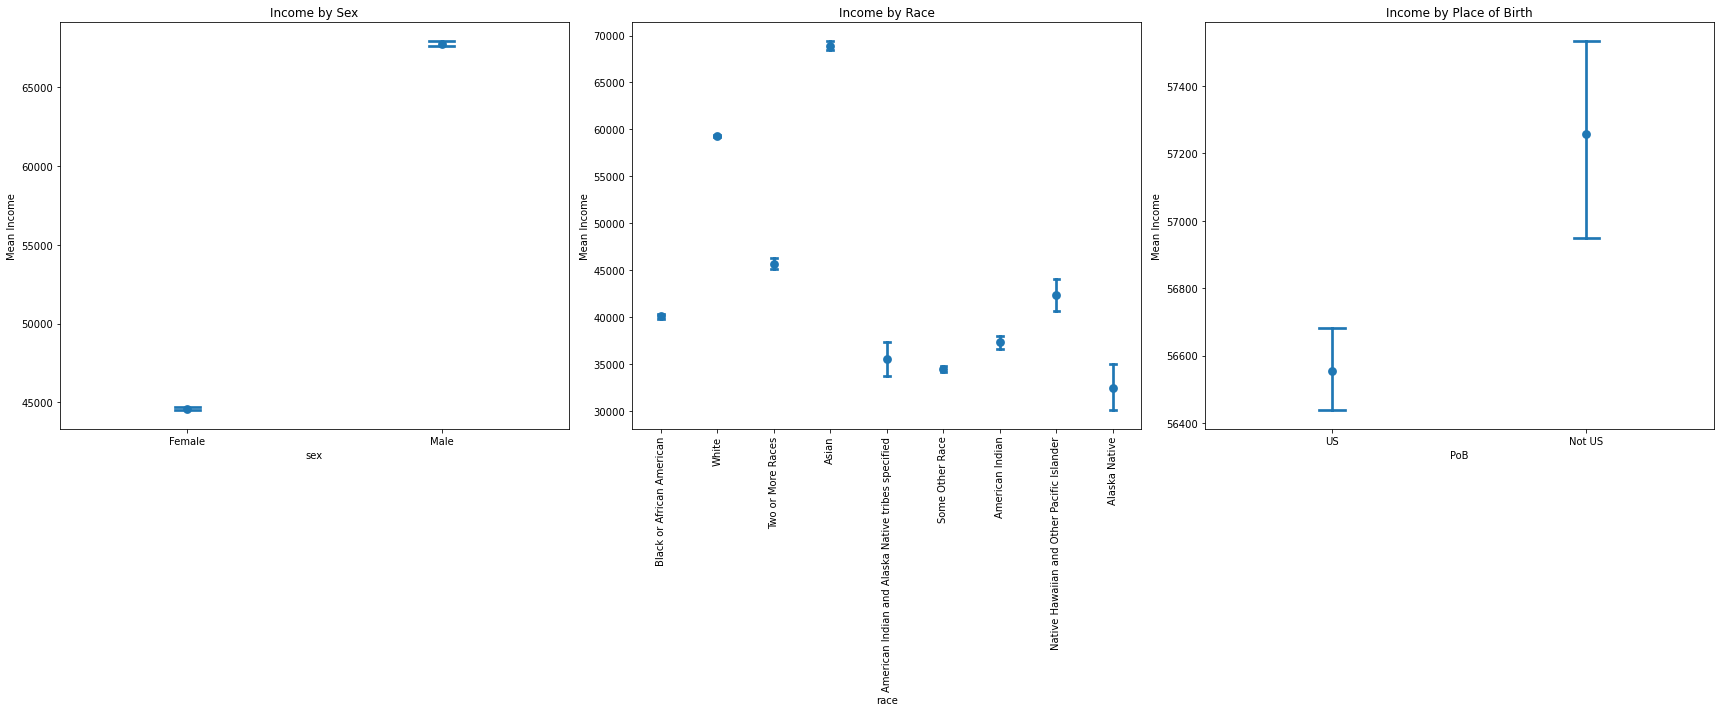

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

df = pd.read_csv('/home/gx2001/ex2_datamining/Census_Data_cleaned.csv')
attributes = ['sex', 'race', 'PoB']
titles = ['Income by Sex', 'Income by Race', 'Income by Place of Birth']
fig, axes = plt.subplots(1, 3, figsize=(24, 10))

for i, attr in enumerate(attributes):
    ax = axes[i]
    sns.pointplot(
        data=df, x=attr, y='income',
        ci=95, ax=ax, linestyles='none'
        , capsize = 0.1
    )
    ax.set_title(titles[i])
    ax.set_ylabel('Mean Income')
    ax.set_xlabel(attr)
    if attr == 'race':
        ax.tick_params(axis = 'x',rotation=90)

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats 
df = pd.read_csv('/home/gx2001/ex2_datamining/Census_Data_cleaned.csv')
sex_groups = df.groupby('sex')
male = sex_groups.get_group('Male').income
female = sex_groups.get_group('Female').income

results = {}

attributes = ['sex', 'race', 'PoB']


print(ttest_ind(female, male , equal_var=False))

Ttest_indResult(statistic=-210.7054920371594, pvalue=0.0)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats #The statistics part of the library
df = pd.read_csv('/home/gx2001/ex2_datamining/Census_Data_cleaned.csv')
PoB_groups = df.groupby('PoB')
us = PoB_groups.get_group('US').income
not_us = PoB_groups.get_group('Not US').income

results = {}

attributes = ['sex', 'race', 'PoB']


print(ttest_ind(us, not_us , equal_var=False))

Ttest_indResult(statistic=-4.339469525125294, pvalue=1.4286728943479615e-05)


In [10]:
import pandas as pd
from scipy.stats import ttest_ind
from itertools import combinations

df = pd.read_csv('/home/gx2001/ex2_datamining/Updated_Dataframe.csv')

results = {}

races = df['race'].unique()

race_pairs = list(combinations(races, 2))

for race1, race2 in race_pairs:
    group1 = df[df['race'] == race1]['income'].dropna()
    group2 = df[df['race'] == race2]['income'].dropna()

    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

    results[(race1, race2)] = {'t_stat': t_stat, 'p_value': p_value}

    print(f"Comparing {race1} vs {race2}")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value}")
    
    if p_value >= 0.05:
        print(f"\033[91mComparing {race1} vs {race2} has no significant difference (P-value: {p_value:.3e})\033[0m")
    else:
        print(f"Comparing {race1} vs {race2} has significant difference (P-value: {p_value:.3e})")
    print("-" * 50)


Comparing Black/African American vs White
T-statistic: -138.233, P-value: 0.0
Comparing Black/African American vs White has significant difference (P-value: 0.000e+00)
--------------------------------------------------
Comparing Black/African American vs Two or More Races
T-statistic: -17.415, P-value: 9.538995051817596e-68
Comparing Black/African American vs Two or More Races has significant difference (P-value: 9.539e-68)
--------------------------------------------------
Comparing Black/African American vs Asian
T-statistic: -95.540, P-value: 0.0
Comparing Black/African American vs Asian has significant difference (P-value: 0.000e+00)
--------------------------------------------------
Comparing Black/African American vs American Indian/Alaska Native tribes specified
T-statistic: 4.789, P-value: 1.7895727419035579e-06
Comparing Black/African American vs American Indian/Alaska Native tribes specified has significant difference (P-value: 1.790e-06)
-------------------------------------

Bημα 4ο:

/tmp/ipykernel_2693/1856523567.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california['log_income'] = np.log(df_california['income'])


Correlation =  0.7041093661756977 p_value =  0.00012307860460300215
Correlation =  0.6512787550166484 p_value =  0.0005666741842675854
Correlation =  0.848722899060949 p_value =  6.92385197615308e-22
Correlation =  0.6833317000211702 p_value =  1.4290221317205615e-11
Correlation =  0.639682202573696 p_value =  2.9950630881053e-12
Correlation =  0.732047886624075 p_value =  3.5140769665892736e-17


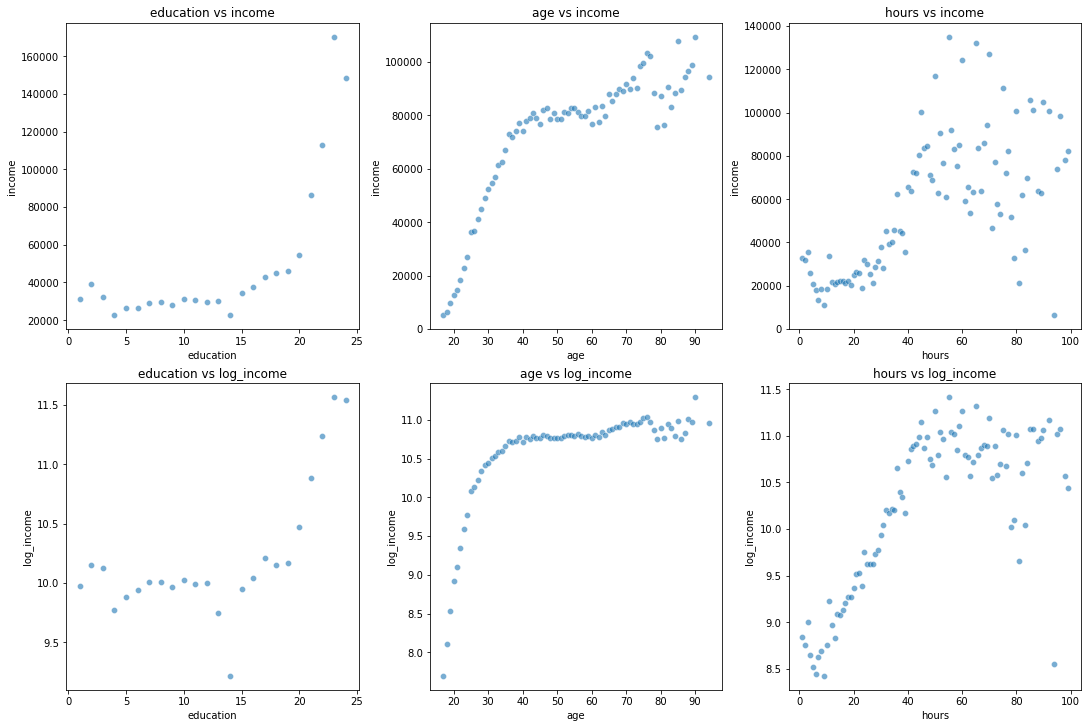

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv('/home/gx2001/ex2_datamining/Census_Data_cleaned.csv')

df_california = df[df['state'] == 'California']

df_california['log_income'] = np.log(df_california['income'])

features = ['education', 'age', 'hours']
income_types = ['income', 'log_income']

fig, axes = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)

for i, feature in enumerate(features):
    for j, income_type in enumerate(income_types):
        mean_income_by_feature = df_california.groupby(feature)[income_type].mean().reset_index()
        ax = axes[j, i]
        sns.scatterplot(x=mean_income_by_feature[feature], y=mean_income_by_feature[income_type], ax=ax, alpha=0.6)
        
        correlation, p_value = pearsonr(mean_income_by_feature[feature], mean_income_by_feature[income_type])
        ax.set_title(f'{feature} vs {income_type}')
        ax.set_xlabel(feature)
        ax.set_ylabel(income_type)
        print("Correlation = " ,correlation , "p_value = " ,  p_value)

plt.show()


Σχολιασμος των αποτελεσματων : 
1.education - income
ισχυρο correlation > 0 συμφωνα και με τις δυο γραφικες παραστασεις γενικα υψηλο επιπεδο εκπαιδευσης σημαινει μεγαλο income μειωνεται οταν χρησιμοποιουμε τον λογαριθμο  
2.age - income 
ισχυρο correlation > 0 συμφωνα και με τις δυο γραφικες παραστασεις γενικα οσο μεγαλωνει η ηλικια ενος ατομου σημαινει μεγαλο income μειωνεται οταν χρησιμοποιουμε τον λογαριθμο
3.hours - income 
ισχυρο correlation > 0 συμφωνα και με τις δυο γραφικες παραστασεις γενικα οσο μεγαλωνει η ηλικια ενος ατομου σημαινει μεγαλο income αυξανεται οταν χρησιμοποιουμε τον λογαριθμο


/tmp/ipykernel_4438/562782132.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california['log_income'] = np.log(df_california['income'])
/tmp/ipykernel_4438/562782132.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


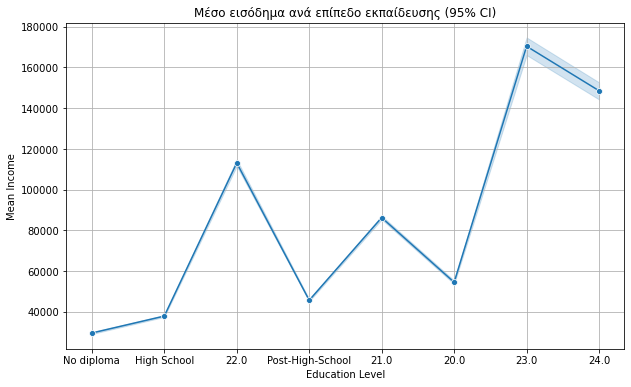

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv('/home/gx2001/ex2_datamining/Updated_Dataframe.csv')

df_california = df[df['state'] == 'California/CA']

df_california['log_income'] = np.log(df_california['income'])


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_california, 
    x='education', 
    y='income', 
    ci=95, 
    marker='o', 
    errorbar=('ci', 95)
)
plt.title('Μέσο εισόδημα ανά επίπεδο εκπαίδευσης (95% CI)')
plt.xlabel('Education Level')
plt.ylabel('Mean Income')
plt.grid(True)
plt.show()


Βημα 5ο: 

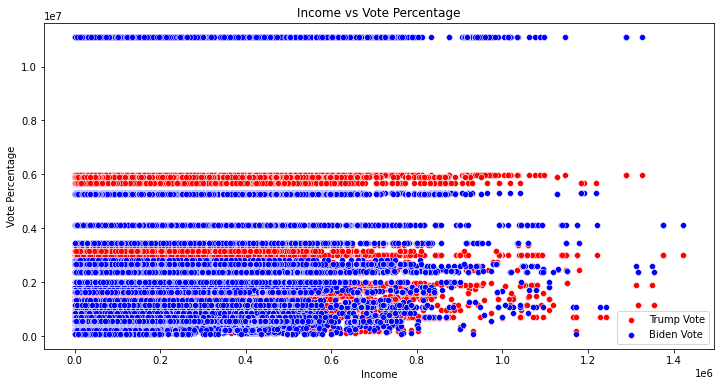


Vote Summary by Income Category:
                   trump_vote    biden_vote
income_category                            
high             2.955063e+06  3.788081e+06
low              2.883215e+06  3.483601e+06

Contingency Table (Income vs Education):
education_category    high     low
income_category                   
high                374141  167551
low                 376071  746738

Chi2: 186795.31599755964, p-value: 0.0, Degrees of Freedom: 1


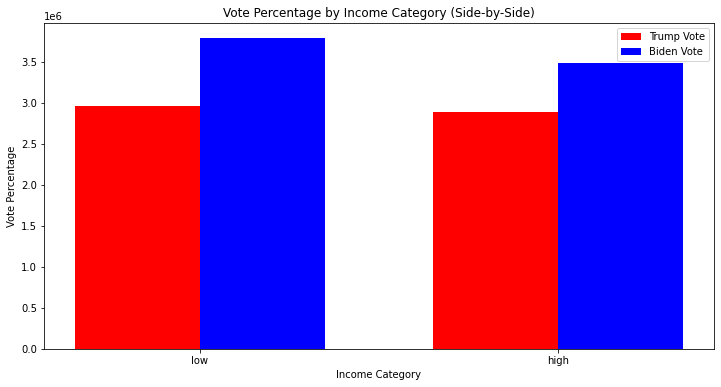

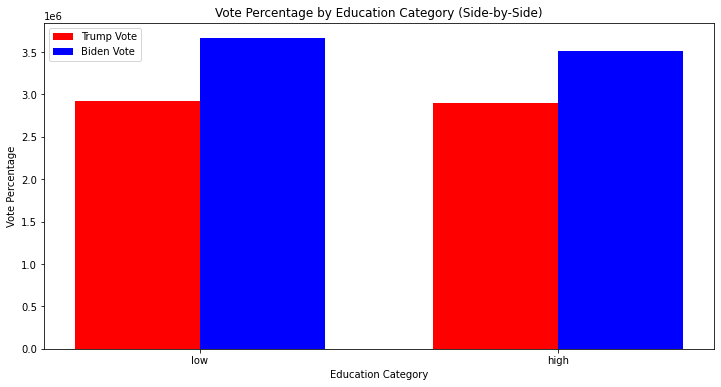

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

elections = pd.read_csv("voting-2020.csv")
income_education = pd.read_csv("/home/gx2001/ex2_datamining/Census_Data_cleaned.csv")  


elections_summary = elections.groupby('state')[['trump_vote', 'biden_vote']].mean().reset_index()
data = pd.merge(elections_summary, income_education, on='state', how='outer')


mean_income = data['income'].mean()
data['income_category'] = np.where(data['income'] < mean_income, 'low', 'high')


data['education_category'] = np.where(data['education'] < 20, 'low', 'high')


plt.figure(figsize=(12, 6))
sns.scatterplot(x='income', y='trump_vote', data=data, label='Trump Vote', color='red')
sns.scatterplot(x='income', y='biden_vote', data=data, label='Biden Vote', color='blue')
plt.title('Income vs Vote Percentage')
plt.xlabel('Income')
plt.ylabel('Vote Percentage')
plt.legend()
plt.show()


summary_table = data.groupby('income_category')[['trump_vote', 'biden_vote']].mean()
print("\nVote Summary by Income Category:")
print(summary_table)

contingency_table = pd.crosstab(data['income_category'], data['education_category'])
print("\nContingency Table (Income vs Education):")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")

plt.figure(figsize=(12, 6))
categories = data['income_category'].unique()
trump_means = data.groupby('income_category')['trump_vote'].mean()
biden_means = data.groupby('income_category')['biden_vote'].mean()
x = np.arange(len(categories))  
width = 0.35  


plt.bar(x - width/2, trump_means, width, label='Trump Vote', color='red')
plt.bar(x + width/2, biden_means, width, label='Biden Vote', color='blue')

plt.xticks(x, categories)
plt.title('Vote Percentage by Income Category (Side-by-Side)')
plt.xlabel('Income Category')
plt.ylabel('Vote Percentage')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
categories = data['education_category'].unique()
trump_means_edu = data.groupby('education_category')['trump_vote'].mean()
biden_means_edu = data.groupby('education_category')['biden_vote'].mean()
x = np.arange(len(categories))  
width = 0.35  


plt.bar(x - width/2, trump_means_edu, width, label='Trump Vote', color='red')
plt.bar(x + width/2, biden_means_edu, width, label='Biden Vote', color='blue')

plt.xticks(x, categories)
plt.title('Vote Percentage by Education Category (Side-by-Side)')
plt.xlabel('Education Category')
plt.ylabel('Vote Percentage')
plt.legend()
plt.show()




Το αποτελεσμα δειχνει οτι ανθρωποι με με μεγαλο εισοδημα πανω απο το μεσο ορο ψηφιζουν biden.Eπισης ανθρωποι που ψηφιζουν trump εχουν υψηλη μορφωση  και παραλληλα εχουν μεγαλο εισοδημα συμφωνα με το χ^2 τεστ και το αντιθετο ισχυει για τον biden .

Βημα 6ο : θα ηταν ενδιαφερον να δειξουμε την συχσετιση που εχει το attribute race σε σχεση με το τι ψηφισαν και απο ποιες περιοχες attribute state ηταν .


Vote Summary by Dominant Race:
                                                      trump_vote    biden_vote
dominant_race                                                                 
Alaska Native                                       4.992959e+05  5.740070e+05
American Indian                                     2.083231e+06  2.613898e+06
American Indian and Alaska Native tribes specified  3.224636e+06  4.338823e+06
Asian                                               3.687761e+06  5.639345e+06
Black or African American                           2.846592e+06  3.214274e+06
Native Hawaiian and Other Pacific Islander          2.402483e+06  3.670416e+06
Some Other Race                                     4.018050e+06  6.035993e+06
Two or More Races                                   3.050872e+06  4.167602e+06
Unknown                                             1.858600e+04  3.173230e+05
White                                               2.807544e+06  3.345581e+06

Contingency Table (

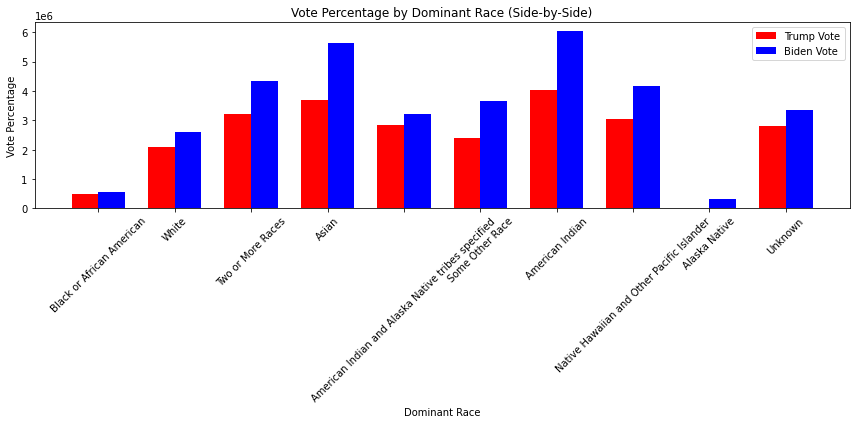

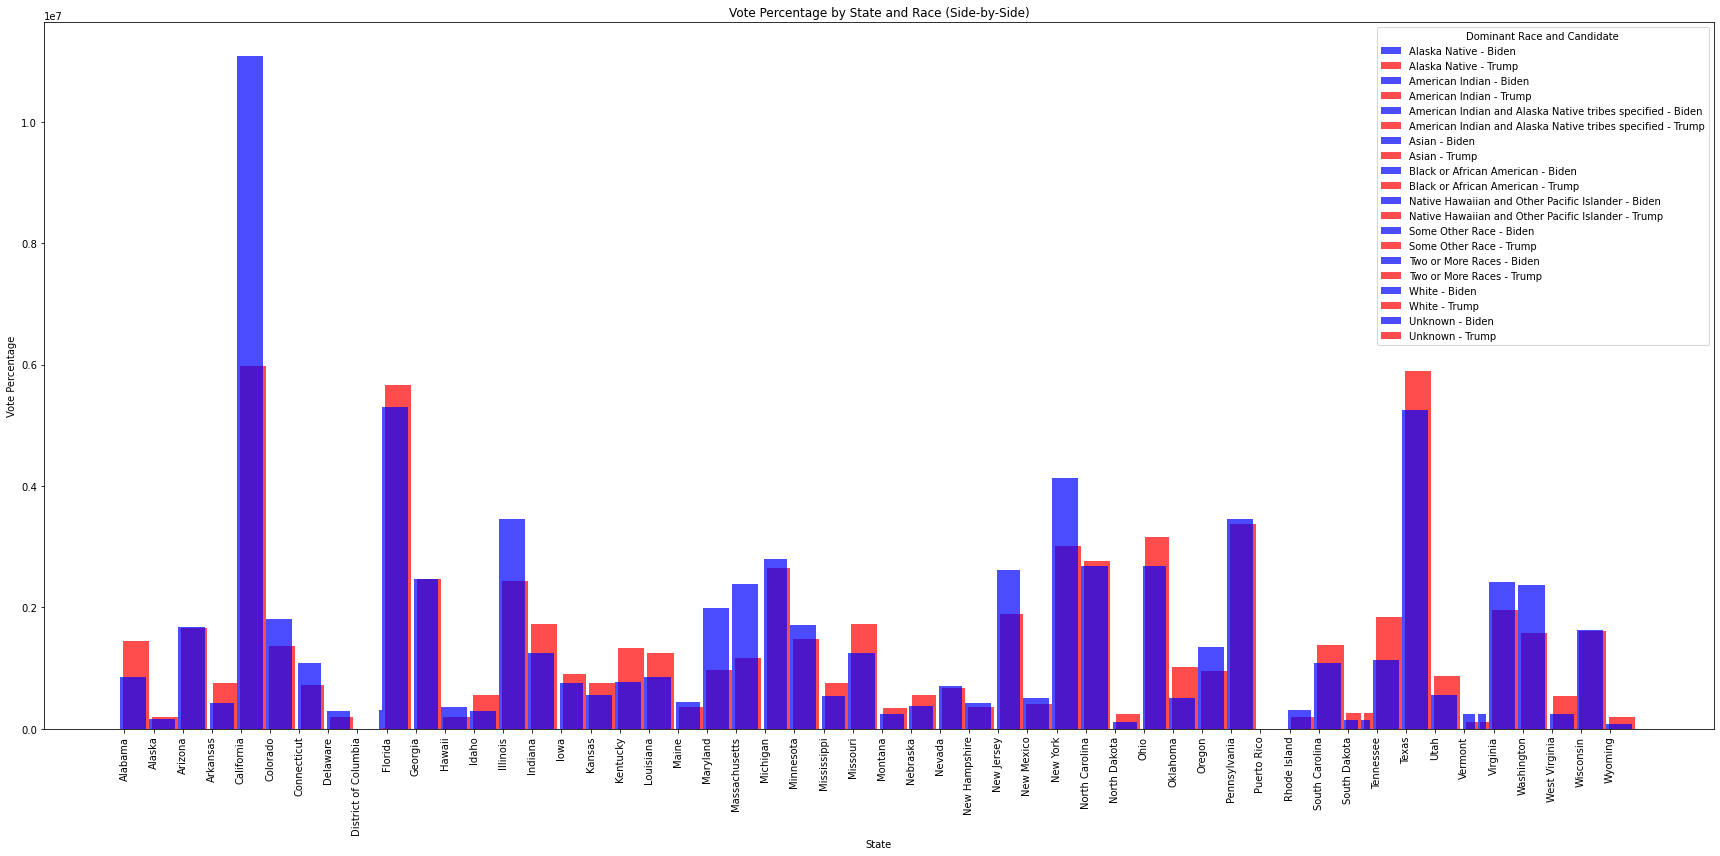

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


elections = pd.read_csv("voting-2020.csv")
income_education = pd.read_csv("/home/gx2001/ex2_datamining/Census_Data_cleaned.csv")  # Contains: state, income, education, race


elections_summary = elections.groupby('state')[['trump_vote', 'biden_vote']].mean().reset_index()
data = pd.merge(elections_summary, income_education, on='state', how='outer')


data['dominant_race'] = data['race'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else 'Unknown')


race_summary = data.groupby('dominant_race')[['trump_vote', 'biden_vote']].mean()
print("\nVote Summary by Dominant Race:")
print(race_summary)

contingency_table = pd.crosstab(data['dominant_race'], np.where(data['trump_vote'] > data['biden_vote'], 'Trump', 'Biden'))
print("\nContingency Table (Race vs Vote):")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")


plt.figure(figsize=(12, 6))
categories = data['dominant_race'].unique()
trump_means = data.groupby('dominant_race')['trump_vote'].mean()
biden_means = data.groupby('dominant_race')['biden_vote'].mean()
x = np.arange(len(categories))  
width = 0.35 

plt.bar(x - width/2, trump_means, width, label='Trump Vote', color='red')
plt.bar(x + width/2, biden_means, width, label='Biden Vote', color='blue')

plt.xticks(x, categories, rotation=45)
plt.title('Vote Percentage by Dominant Race (Side-by-Side)')
plt.xlabel('Dominant Race')
plt.ylabel('Vote Percentage')
plt.legend()
plt.tight_layout()
plt.show()

aggregated_data = data.groupby(['state', 'dominant_race']).mean().reset_index()


states = aggregated_data['state'].unique()
race_categories = aggregated_data['dominant_race'].unique()
bar_width = 0.1  

x_positions = np.arange(len(states))

plt.figure(figsize=(24, 12))

for i, race in enumerate(race_categories):
    race_data = aggregated_data[aggregated_data['dominant_race'] == race]
    y_biden = race_data.set_index('state').reindex(states)['biden_vote'].fillna(0)
    y_trump = race_data.set_index('state').reindex(states)['trump_vote'].fillna(0)

    plt.bar(x_positions + (i * bar_width), y_biden, width=bar_width, label=f'{race} - Biden', alpha=0.7, color='blue')    plt.bar(x_positions + (i * bar_width) + bar_width, y_trump, width=bar_width, label=f'{race} - Trump', alpha=0.7, color='red')

plt.xticks(x_positions + bar_width, states, rotation=90)
plt.xlabel('State')
plt.ylabel('Vote Percentage')
plt.title('Vote Percentage by State and Race (Side-by-Side)')
plt.legend(title='Dominant Race and Candidate')
plt.tight_layout()

plt.show()
